<h1><center><b>Loan Amount Exploratory Data Analysis </b></center></h1>
 

## Define the Problem and Set Objectives  
* Clean and Manipulat the Data.

* Conduct exploratory data analysis (EDA) and statistical analysis.

* Create different charts and plots to represent the distributions and relationships between variable.   

* Answer Questions about the Data...

## Import the needed Python libraries

In [1]:
import pandas as pd  # For Data Manipulation
import numpy as np   # For Scientific Computing
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Advanced Data Visualization 



---

## Load the Data Set

In [3]:
Data = pd.read_csv("Loan_amount.csv")
Data.info() # General Information about the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount                  20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [4]:
# Find the Shape ( rows , columns ) of the DataSet 
Data.shape
print("Number of Rows -->" , Data.shape[0])
print("Number of Columns -->" , Data.shape[1])

# Data Types
Data.dtypes

Number of Rows --> 20000
Number of Columns --> 23


Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount                    float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

---
# **Data Cleaning and Manipulation.** 

In [5]:
# Check Missing Values (Number of missing values in each variable)

Data.isna().sum()

# For Proportions 
# Data.isna().sum() *100 / len(Data)

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount                       0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64


---
## - Handling Missing Values

In [6]:

Columns = ['Gender' , 'Type of Employment', 'Current Loan Expenses (USD)']
Data = Data.dropna(subset = Columns)

# Handling Missing Values (Mean)
Data['Property Age'] = Data['Property Age'].fillna(Data['Property Age'].mean())
Data['Income (USD)'] = Data['Income (USD)'].fillna(Data['Income (USD)'].mean())
Data['Income (USD)'] = Data['Income (USD)'].fillna(Data['Income (USD)'].mean())
Data['Credit Score'] = Data['Credit Score'].fillna(Data['Credit Score'].mean())


# Handling Missing Values (Mode)
Data['Income Stability'] = Data['Income Stability'].fillna(Data['Income Stability'].mode()[0])
Data['Has Active Credit Card'] = Data['Has Active Credit Card'].fillna(Data['Has Active Credit Card'].mode()[0])
Data['Location'] = Data['Location'].fillna(Data['Location'].mode()[0])
Data['Dependents'] = Data['Dependents'].fillna(Data['Dependents'].mode()[0])
Data['Property Location'] = Data['Property Location'].fillna(Data['Property Location'].mode()[0])

print(Data.shape)

# Recheck the missing values 
Data.isna().sum()


(15226, 23)


Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount                    0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

## - Cheking for Duplicated Records 


In [7]:

Data.duplicated().sum()


0

In [8]:
# Rename the Column ' Current Loan Expenses '
Data = Data.rename(columns = {'Current Loan Expenses (USD)':'CLE (USD)'})


# Convert Property Price type to Numeric 
Data['Property Price'] = Data['Property Price'].replace( '?', 0 )
Data['Property Price'] = pd.to_numeric(Data['Property Price'])
PriceM = (Data['Property Price'].sum()) /(Data['Property Price'].count() - 129)

Data['Property Price'] = Data['Property Price'].replace( 0, PriceM )


<br><br>

---

## **- Now the Data is ready for EDA,  Steps follows a Systematic Set of Steps to Explore Data**
<br>

In [9]:
Data.sample(3)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
480,C-778,Janell Cartledge,M,41,1817.83,Low,Working,Core staff,Semi-Urban,26115.52,...,2.0,642.22,0,Active,684,1817.83,4,Rural,1,36528.62
9401,C-24289,Mona Stepney,F,47,2231.52,Low,Working,Accountants,Semi-Urban,23862.91,...,3.0,794.05,0,Inactive,132,2231.52,1,Semi-Urban,1,39111.13
15243,C-4236,Nova Kendig,F,42,1757.29,Low,Working,Laborers,Semi-Urban,46183.38,...,1.0,672.60,0,Inactive,834,1757.29,3,Urban,1,83888.69


<br><br>

---


## **- Basic Statistics Summary -- Univariate Analysis**

In [10]:
sts = Data[['Age','Income (USD)','Loan Amount','CLE (USD)','Dependents','Credit Score','Property Age', 'Property Price']]
sts.describe()

,Age,Income (USD),Loan Amount,CLE (USD),Dependents,Credit Score,Property Age,Property Price
count,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000,15226.000000
mean,37.591685,2569.624026,88862.361825,411.173665,2.289702,731.210853,2565.874637,133455.407456
std,15.022213,1396.232144,59851.014410,215.851874,0.940849,69.172196,1382.376947,92620.198529
min,18.000000,397.450000,6185.480000,42.950000,1.000000,580.040000,397.450000,7353.490000
25%,23.000000,1706.010000,40974.252500,253.702500,2.000000,676.460000,1707.762500,62140.000000
50%,37.000000,2308.235000,74364.645000,378.245000,2.000000,731.210853,2314.595000,111803.245000
75%,51.000000,3065.622500,120820.747500,522.807500,3.000000,785.107500,3057.390000,179609.747500
max,64.000000,30427.680000,576335.680000,3305.970000,13.000000,891.910000,30427.680000,816375.090000


In [11]:
Data.describe(include='object')

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location,Co-Applicant
count,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226,15226
unique,15226,15226,2,1,5,18,3,2,2,3,3,3
top,C-26247,Tandra Olszewski,F,Low,Working,Laborers,Semi-Urban,N,Y,Active,Semi-Urban,1
freq,1,1,7734,15226,9583,3725,11040,9496,10137,5721,5369,13344



---

## **- Number of Unique Values in each variable**

In [12]:
print(Data.nunique())

Customer ID               15226
Name                      15226
Gender                        2
Age                          47
Income (USD)              14316
Income Stability              1
Profession                    5
Type of Employment           18
Location                      3
Loan Amount               15217
CLE (USD)                 13646
Expense Type 1                2
Expense Type 2                2
Dependents                   10
Credit Score              11215
No. of Defaults               2
Has Active Credit Card        3
Property ID                 999
Property Age              14217
Property Type                 4
Property Location             3
Co-Applicant                  3
Property Price            15092
dtype: int64


---
## **Correlation Anaylsis -- Bivariate Analysis**

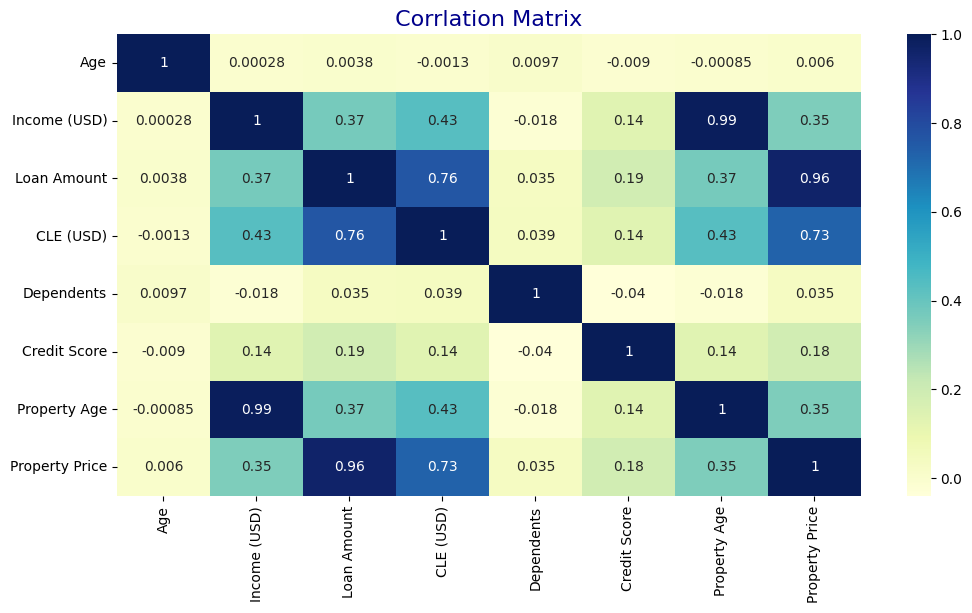

In [13]:
# DataSet of Numaric Variable 
NumData = Data[['Age','Income (USD)','Loan Amount','CLE (USD)','Dependents','Credit Score','Property Age', 'Property Price']]

plt.figure(figsize =(12,6))
sns.heatmap(NumData.corr() , annot = True, cmap ='YlGnBu')
plt.title(" Corrlation Matrix ", color = 'darkblue' , fontsize =16)
plt.show()


### - As we see in a Correlation Matrix there are a few number of variable that Correlated to Loun Amount <br> in our data, like 'Income' 'Current Loan Expenses' ,'Property Age' , 'Credit Score'.<br> <br>- And 'Property Price' have a strong positive linear relationship with Loan Amount, that we can use it to create a simple linear model.

### - And we see that 'Income' and 'Property Age' also have a strong positive linear relationship with each other.

### - And 'Current Loan Expenses' and 'Property Price' also have a strong relationship with each other.



<br><br>

---


# **Data Visualization**
## **- Pie Chart that represnt the proportion of Profession in our Data**

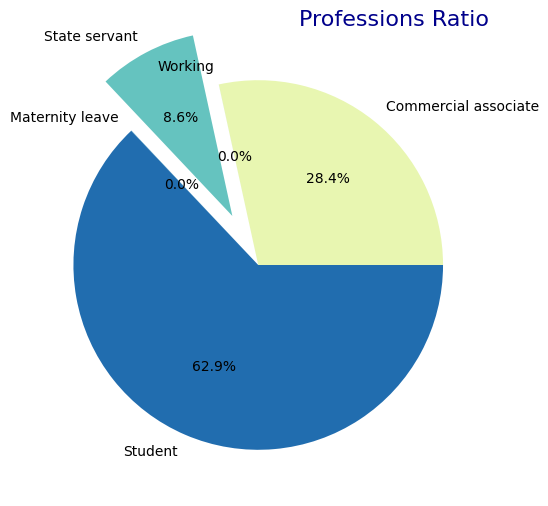

In [14]:
labels = Data['Profession'].unique()
SubData1 = Data.groupby(Data['Profession'])['Customer ID'].count()


plt.figure(figsize  = (20,6))
palette_color = sns.color_palette('YlGnBu') 
plt.pie(SubData1, labels=labels, autopct='%1.1f%%',colors=palette_color , explode = [0.,0.0,0.3 ,0,0]  ) 
plt.title('Professions Ratio' , loc ='right' , color = 'darkblue' , fontsize =16)

plt.show()

### **- The majority of people who take out loans are students, often for educational purposes.**

--- 
## **- Bar Chart shows the number of Customer and there type of Employment.**

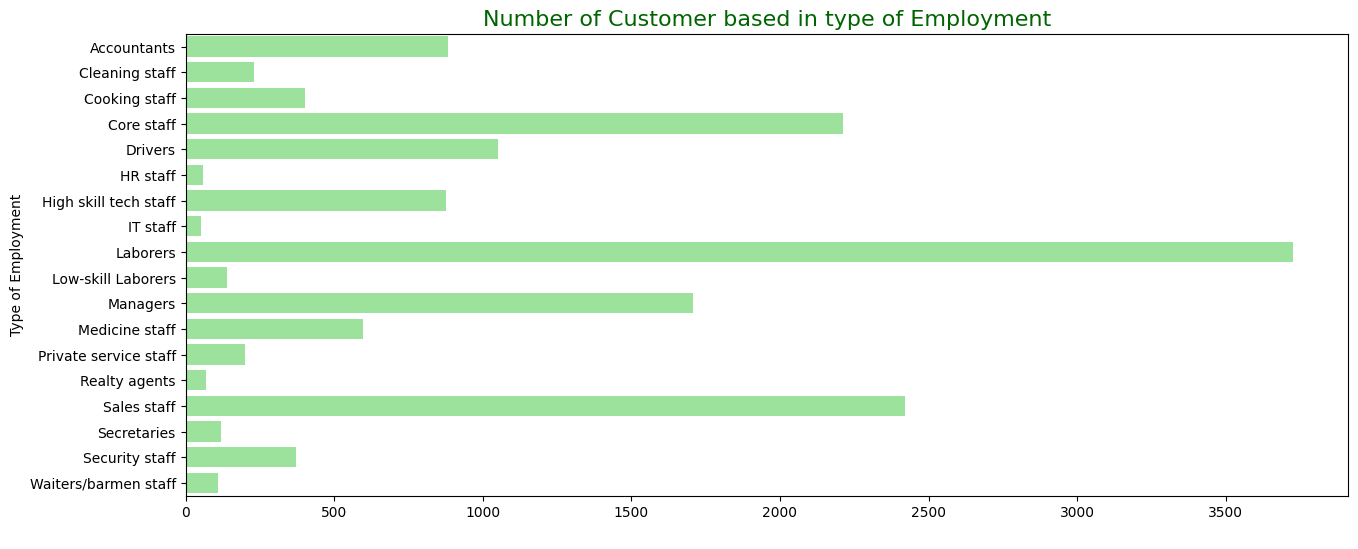

In [15]:
labels = Data['Type of Employment'].unique()
SubData2 = Data.groupby(Data['Type of Employment'])['Customer ID'].count()

plt.figure(figsize  = (15,6))
sns.barplot(SubData2 , width=0.8 , orient="y", color = 'lightgreen' ) 
plt.xlabel(' ')

plt.title("Number of Customer based in type of Employment" , color = 'darkgreen' , fontsize =16)
plt.show()

---

## **- Pie Chart that show Gender ratio**

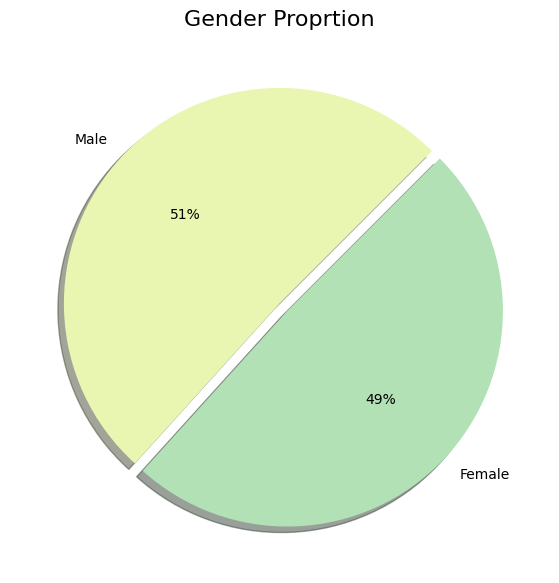

In [16]:
keys =['Male',  'Female']

Gender = Data.groupby(Data["Gender"])['Customer ID'].count()


plt.figure(figsize= (10,7))
palette_color = sns.color_palette('YlGnBu') 
plt.pie(Gender, labels=keys, autopct='%.0f%%',colors=palette_color , explode = [0,0.05] , shadow=True, startangle=45) 


plt.title("Gender Proprtion" , color = 'black' , fontsize =16)
plt.show()

---

## **- Box plots for Property Location and there Prices**

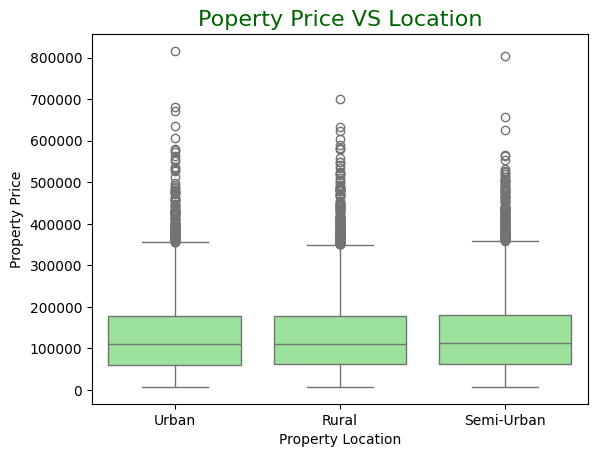

In [17]:
sns.boxplot(data=Data , x ='Property Location', y ='Property Price', color = 'lightgreen')
plt.title('Poperty Price VS Location' , color = 'darkgreen' , fontsize =16)
plt.show()

### **- There are a lot of outliers!! , this is interesting ...**

---


### **- Pair plot that shows different distribution and relationship for several variables that have good relationship with loan amount**

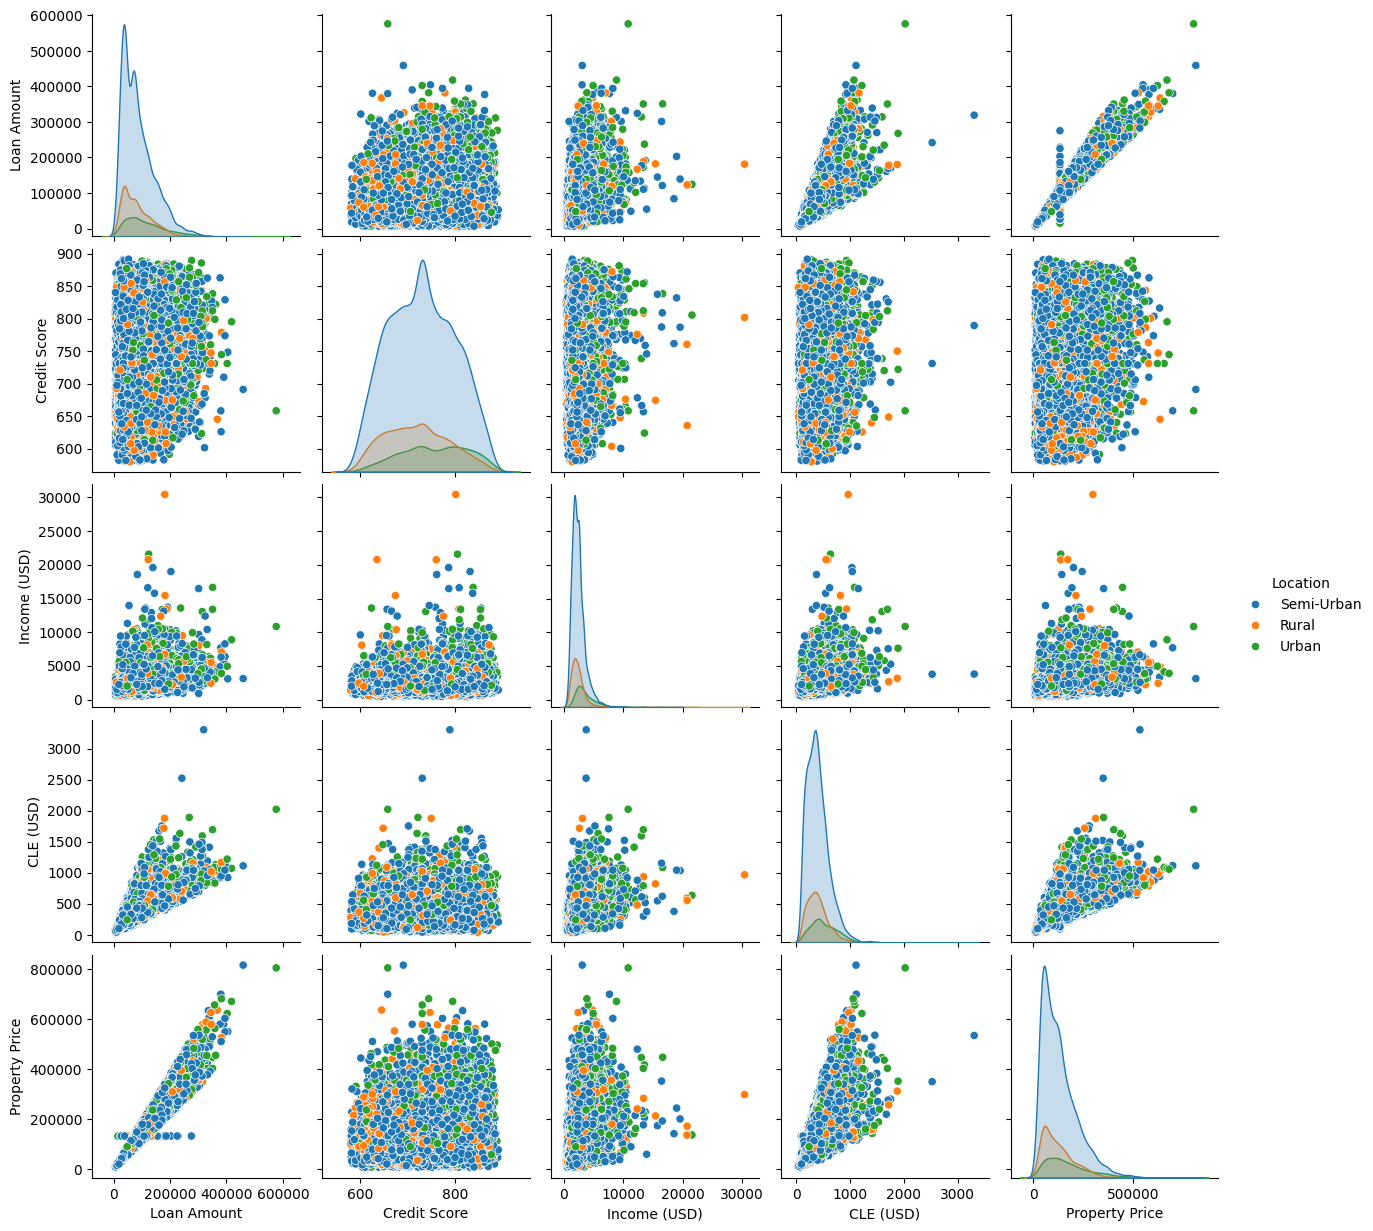

In [18]:
SubData =  Data[['Loan Amount','Credit Score' , 'Income (USD)', 'CLE (USD)' ,'Property Price', 'Location']]
sns.pairplot(SubData,  hue='Location')
plt.show()

---
### **- Regression plots that describe the relationship for dependent variable 'Loan Amount' with top 4<br> <br>  independent variable that has a good relationship with it.**

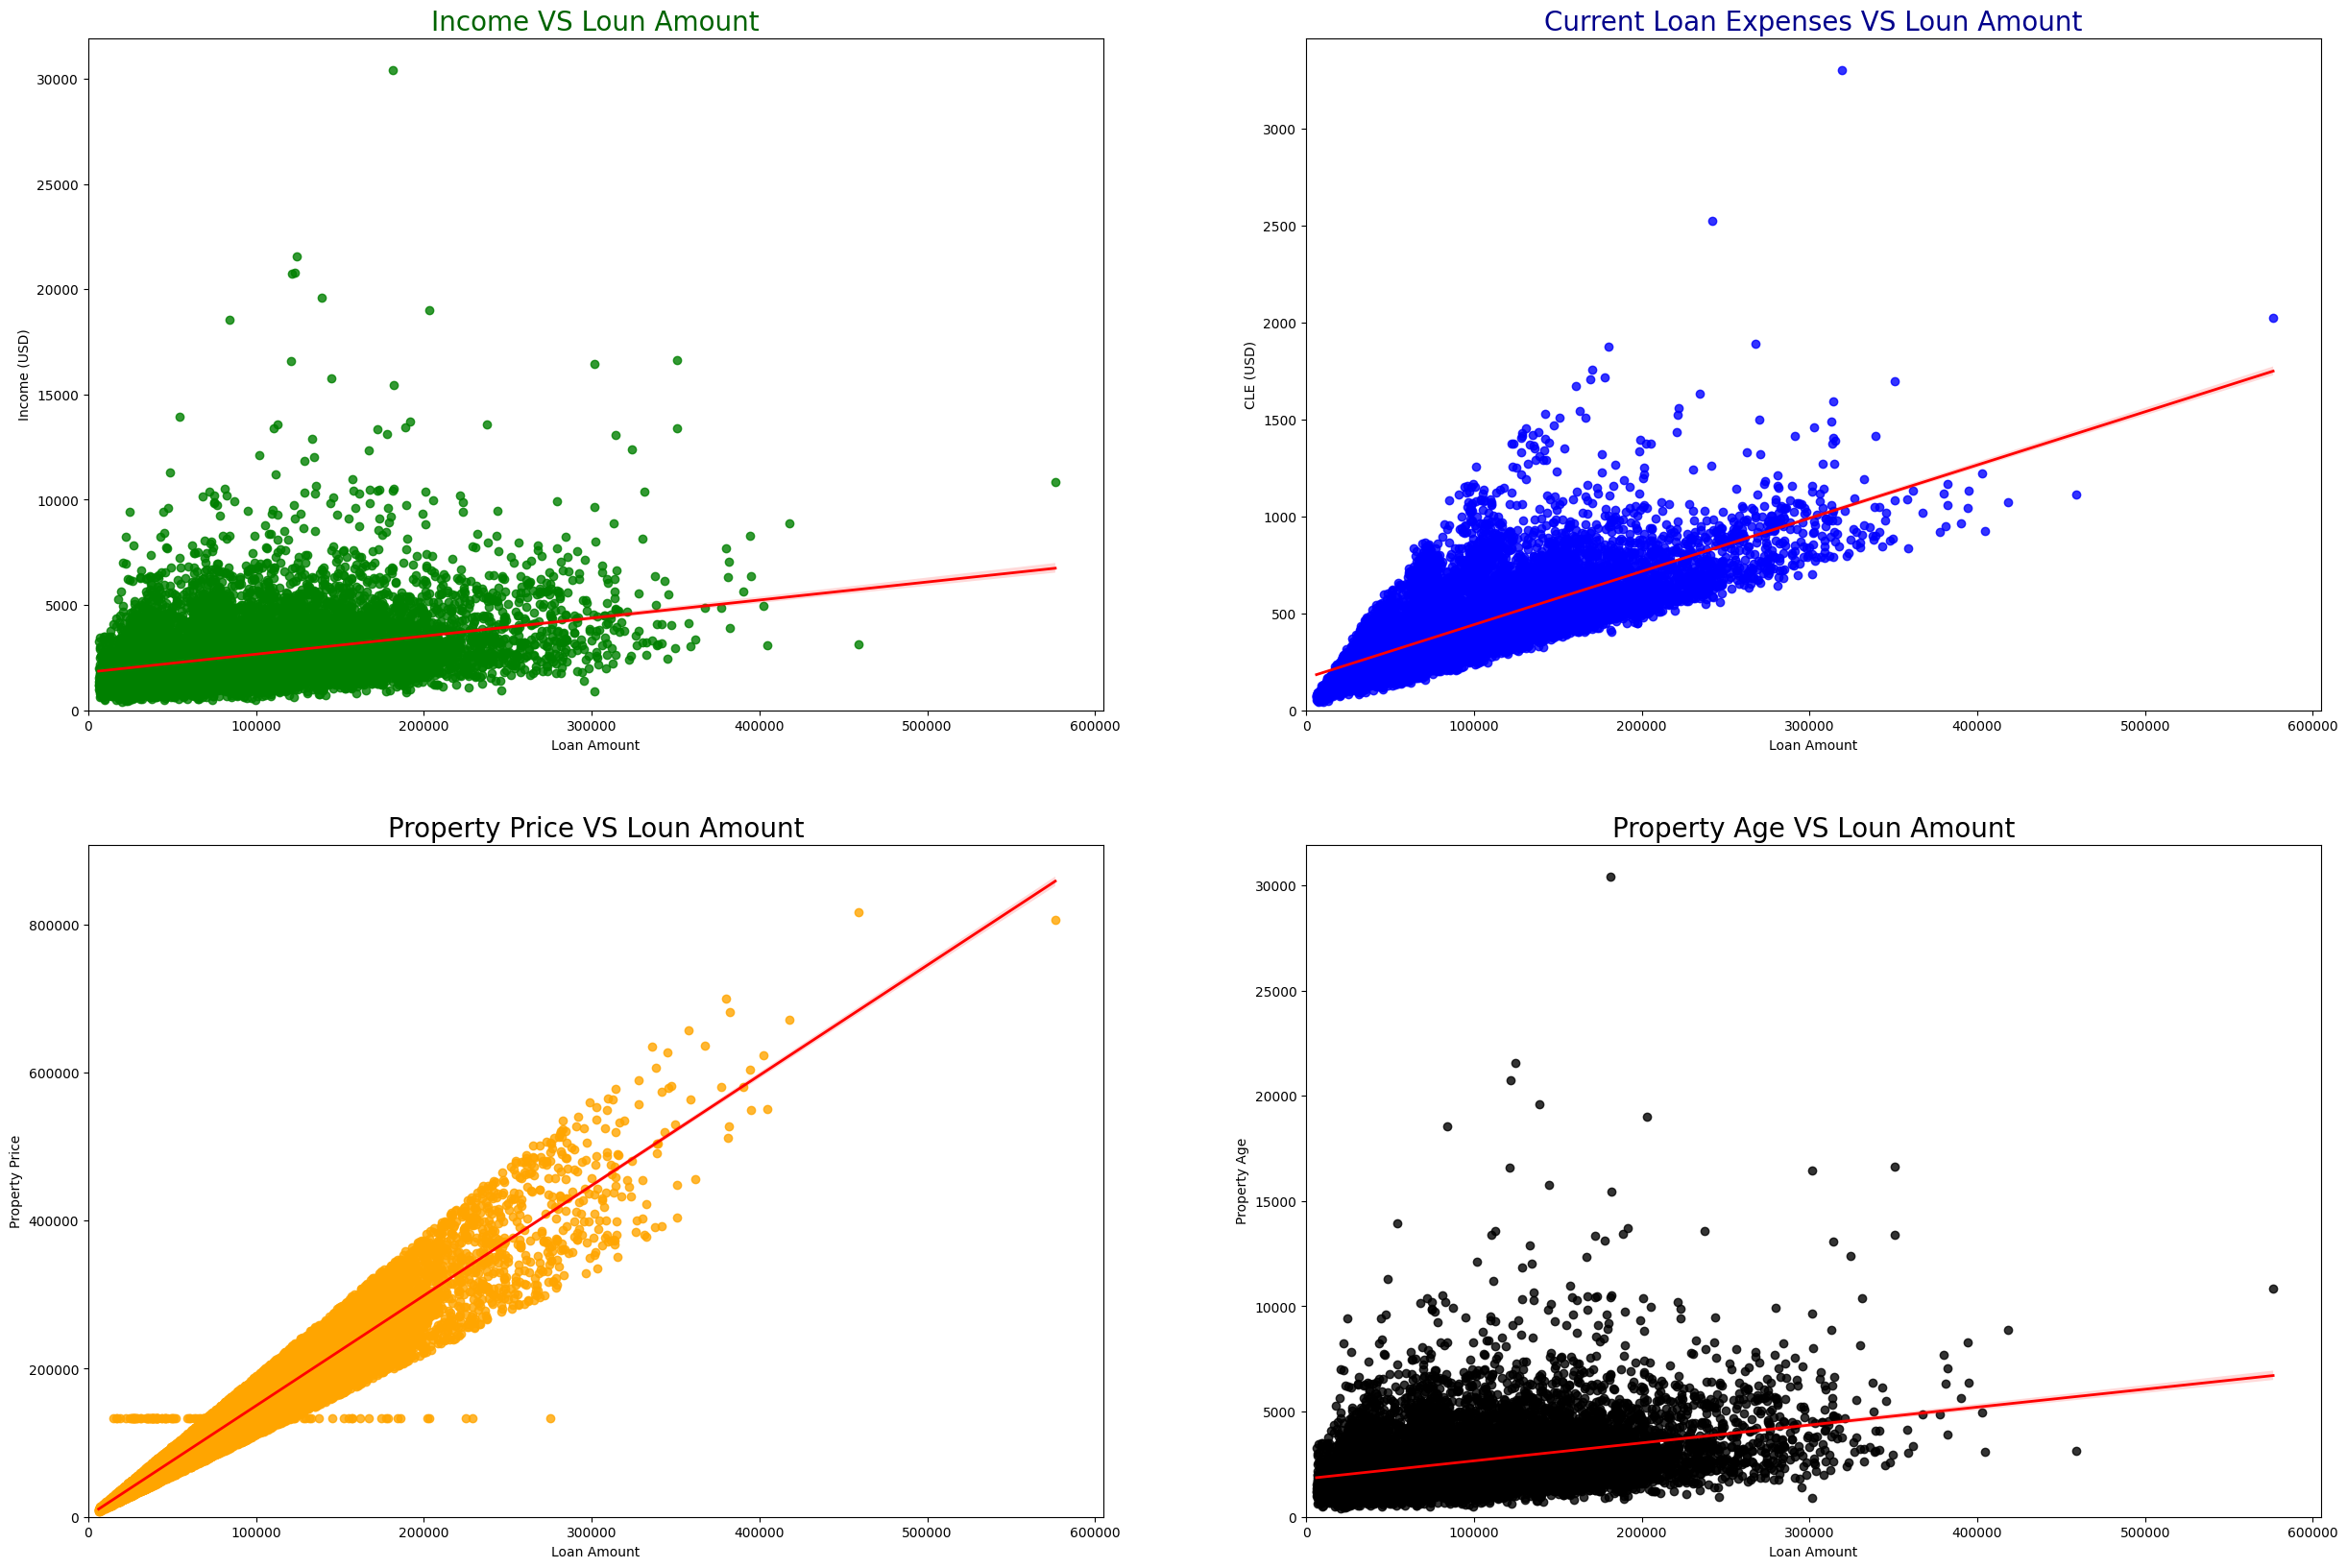

In [19]:
# Using Subplots function in seaborn lib

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
sns.regplot(data= Data, y='Income (USD)' , x='Loan Amount' , ax= axes[0 ,0] ,line_kws={"color": "red", "linewidth": 2}, color = 'green')
sns.regplot(data= Data, y='CLE (USD)' , x='Loan Amount' , ax= axes[0,1] ,line_kws={"color": "red", "linewidth": 2}, color =  'blue')
sns.regplot(data= Data , y = 'Property Price' , x='Loan Amount' , ax= axes[1, 0] ,line_kws={"color": "red", "linewidth": 2}, color =  'orange')
sns.regplot(data= Data , y = 'Property Age' , x='Loan Amount' , ax= axes[1, 1] ,line_kws={"color": "red", "linewidth": 2}, color =  'black')

axes[0,0].set_ylim(0)
axes[0,0].set_xlim(0)

axes[0,1].set_ylim(0)
axes[0,1].set_xlim(0)

axes[1,0].set_ylim(0)
axes[1,0].set_xlim(0)

axes[1,1].set_ylim(0)
axes[1,1].set_xlim(0)



axes[0,0].set_title("Income VS Loun Amount" , color = 'darkgreen' , fontsize = 20)
axes[0,1].set_title("Current Loan Expenses VS Loun Amount" , color = 'darkblue' , fontsize = 20)
axes[1,0].set_title("Property Price VS Loun Amount" ,color = 'black' , fontsize = 20)
axes[1,1].set_title("Property Age VS Loun Amount" , color = 'black' , fontsize = 20)




plt.show()

---
### **- Histogram That Show Age Distribution**



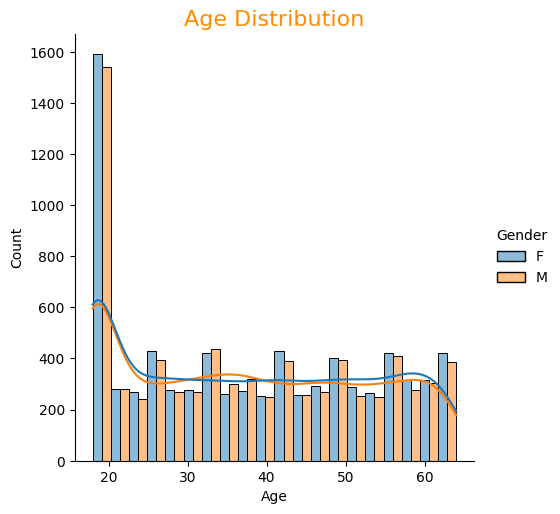

In [20]:
sns.displot(data =Data, x="Age", hue="Gender" , multiple="dodge" , bins = 20 , kde=True)
plt.title("Age Distribution" , color = 'darkorange', fontsize ='16')
plt.show()


---
### **- Line Chart that show Income across different age**

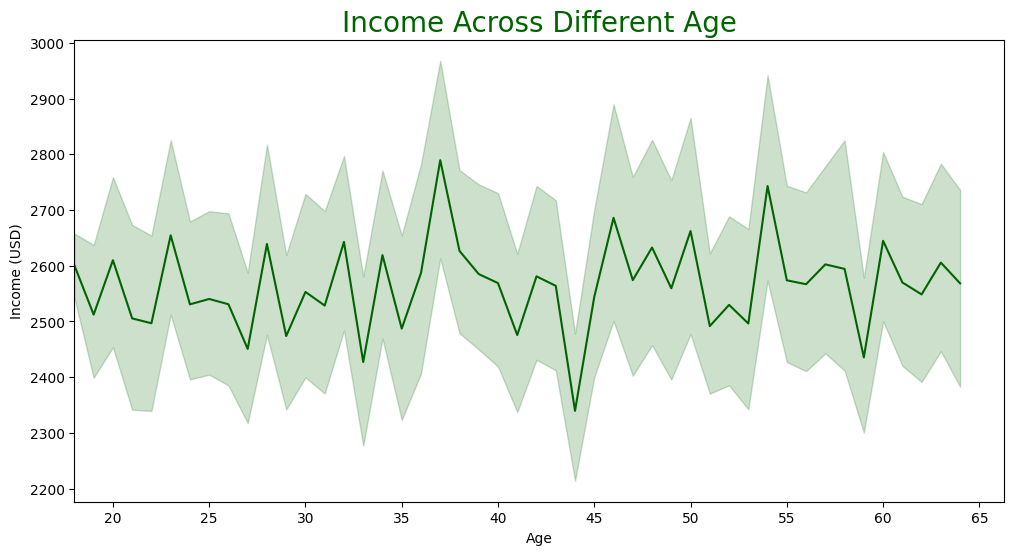

In [21]:
plt.figure(figsize = (12,6))
sns.lineplot(data = Data , x = 'Age', y='Income (USD)' , color ='darkgreen')

plt.xticks(np.arange(20,70,5))
plt.xlim(18)

plt.title("Income Across Different Age" , color = 'darkgreen' , fontsize = 20)

plt.show()

## Save the new data set after processing

In [21]:
Data.to_csv("Loan Amount (Updated).csv")